<a href="https://colab.research.google.com/github/leta-ha/HUFS-Bigdata-Team-Project/blob/main/bigdata_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#코랩에서 파일을 읽어오기 위한 코드
from google.colab import files 
file_uploaded = files.upload()

Saving winequality-both.csv to winequality-both.csv


                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


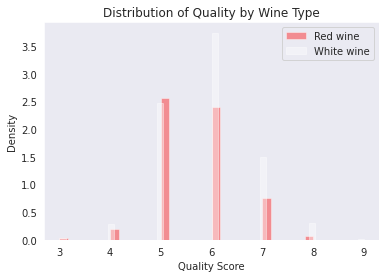

In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula as saf
from statsmodels.formula.api import ols, glm

wine = pd.read_csv(io.BytesIO(file_uploaded['winequality-both.csv']), encoding='UTF-8')
wine.columns = wine.columns.str.replace(' ', '_')

# Display description statistics for quality by wine type
print(wine.groupby('type')[['quality']].describe().unstack('type'))

# Calculate specific quantities
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

# Look at the distribution of quality by wine type
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="white", label="White wine"))
# sns.axlabel("Quality Score", "Density")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [ ]:
# Calculate correlation matrix for all variables
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [ ]:
# Test whether mean quality is different between red and white wines
print(wine.groupby(['type'])[['quality']].agg(['std','mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

# Fit a multivariate linear regression model wwine_standardized - (wine - wine.mean()) / wine.std()
my_formula = "quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity"
lm = ols (my_formula, data=wine).fit()

print(lm.summary())
print("\nQuantities you can extract from the result: \n%s" % dir(lm))
print("\nCoefficients: \n%s" % lm.params)
print("\nCoefficient Std Errors: \n%s" % lm.bse)
print("\nAdj. R-squared: \n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f P-value: %.2f" % (lm. fvalue, (lm.f_pvalue)))
print("\nNumber of obs: %d Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686 pvalue: 0.0000
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:09:30   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err         

In [ ]:
# Fit a multivariate linear model with standardized independent variables
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:24:13   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

In [ ]:
# Predict quality scores for "new" observations
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]


In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula as saf
from statsmodels.formula.api import ols, glm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

wine = pd.read_csv(io.BytesIO(file_uploaded['winequality-both.csv']), encoding='UTF-8')
df = pd.DataFrame(wine)
df = df.drop(['type'], axis = 1) #type은 red, white wine으로 문자열이라서 열 삭제

# train_test_split
feature_df = df.iloc[:, :-1]
target_df = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3, random_state=121)


# Standardization 전처리
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print(X_train_std)

[[-1.93993165 -1.20085038 -0.20213201 ...  3.36035479 -0.27196781
   0.69319512]
 [-0.47177652 -0.92235533 -0.47745419 ...  0.50372885 -0.74368397
  -0.90091913]
 [-0.62631916 -0.42725303  1.17447889 ...  0.13112547 -0.67629595
  -1.06872063]
 ...
 [ 0.14639406 -0.55102861  0.2796818  ... -0.17937735 -0.60890793
   0.27369137]
 [-0.47177652 -0.67480418 -0.13330147 ... -1.11088581  0.06497231
  -1.23652213]
 [-0.39450519  0.19162484  0.62383453 ... -0.36567904 -0.40674386
  -0.73311763]]


In [ ]:
from sklearn.metrics import accuracy_score
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


wine = pd.read_csv(io.BytesIO(file_uploaded['winequality-both.csv']), encoding='UTF-8')
df = pd.DataFrame(wine)
df = df.drop(['type'], axis = 1) #type은 red, white wine으로 문자열이라서 열 삭제

# train_test_split
feature_df = df.iloc[:, :-1]
target_df = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.5, random_state=0)

# Standardization 전처리
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

# 가우시안 나이브 베이즈 분류기 학습. X_test 데이터로 결과를 예측해서 y_pred를 채운다.
clf = GaussianNB()
y_pred = clf.fit(X_train_std, y_train).predict(X_test)

#실제 값과 y 예측 값 비교 -> 틀린 개수 출력
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test == y_pred).sum()))

Number of mislabeled points out of a total 3249 points : 31


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
